In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(reticulate)

In [3]:
pbmc.data <- Read10X(
    'filtered_gene_bc_matrices/hg19/'
)

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead



In [4]:
pbmc <- CreateSeuratObject(counts = pbmc.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
pbmc <- NormalizeData(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”


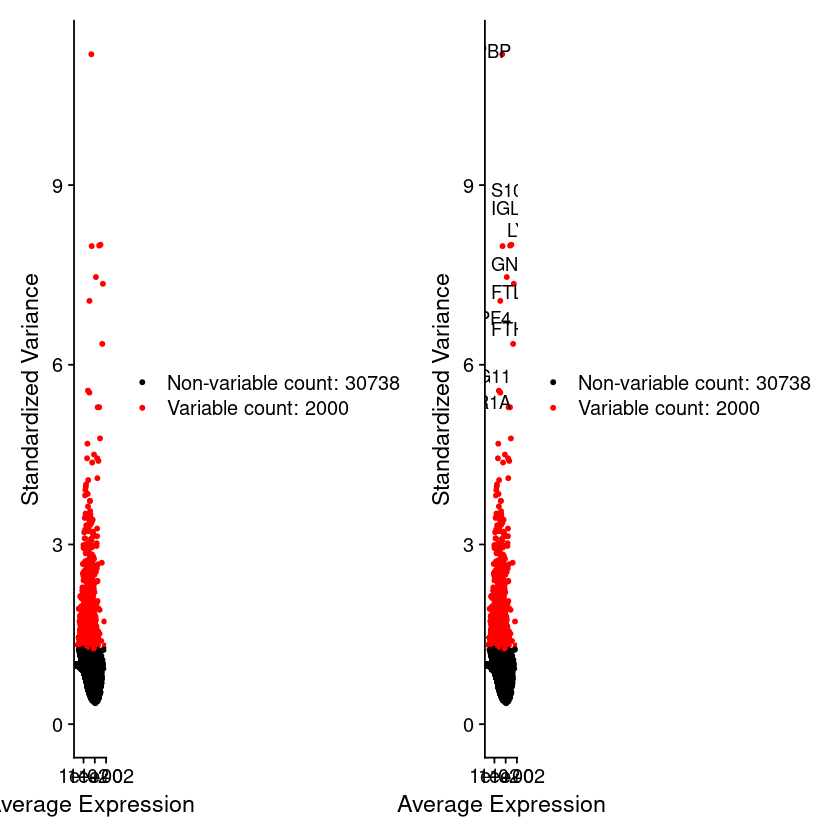

In [6]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [7]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [8]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc), npcs = 500)

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, GIMAP7 
	   BEX2, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, NKG7, KLRG1, SAMD3 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
PC_ 3 
Positive:  PPBP, PF4, SDPR, SPARC, GNG11, NRGN, GP

In [9]:
head(pbmc@reductions$pca[[]])

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_491,PC_492,PC_493,PC_494,PC_495,PC_496,PC_497,PC_498,PC_499,PC_500
AAACATACAACCAC-1,4.6045241,0.6234328,0.6465229,-1.7054010,0.8051816,1.3371106,0.9829216,0.9723629,-1.00491790,0.9915709,⋯,0.5737571,0.17997902,-0.271644584,-1.2923958,2.04029466,-1.0232884,0.8292739,1.7363111,-1.4617211,-1.1403447
AAACATTGAGCTAC-1,0.2510676,-4.5884220,-6.7836763,6.4942015,0.8041997,0.3479615,-2.5026386,1.7153129,0.26908524,1.7055348,⋯,2.0201885,2.10801627,0.003205336,-0.6604979,-0.57367841,-0.8202277,-0.6167303,-1.3365850,1.1445033,-0.2651698
AAACATTGATCAGC-1,2.7264534,3.9110928,0.4707721,-1.0518768,4.9673488,-0.4141458,-1.3973752,-0.1164631,3.66817934,1.7882280,⋯,-1.4250768,-0.17733510,0.404066208,-0.7760004,-2.03110187,0.3472016,-1.6869790,-0.7339243,-0.9329790,0.2911434
AAACCGTGCTTCCG-1,-11.7971930,-0.1480103,-0.5741236,-0.2570985,-0.5529685,-1.6726925,3.3711358,-0.2841218,-0.42004385,-0.5806492,⋯,-1.2724301,-1.24880909,-0.056782132,-1.4666852,-0.09496665,1.1724278,0.4945778,0.4674039,-2.2260529,-0.2987749
AAACCGTGTATGCG-1,3.2279503,5.8394049,-0.7921919,1.9229883,-8.3809634,1.0347166,0.9174435,-3.2659323,-0.32360216,1.1636853,⋯,-2.2755846,-0.02254866,0.570227231,-2.3161218,-1.98614507,1.6153222,0.7124168,1.8178699,0.9231308,-1.0894884
AAACGCACTGGTAC-1,2.7040317,-1.4219607,0.7612598,-2.2488029,2.4516932,0.2203399,-1.4347133,-0.2848012,0.09711365,-0.7591335,⋯,2.2066784,-0.60101368,-1.464376384,0.9625588,0.22816485,0.4052369,0.0893808,1.8958865,0.4092784,-2.2952075


This is the first point where difference could appear. Calculate distance matrix based on the Scaled Genes.

In [11]:
scaled.data <- GetAssayData(pbmc, slot = "scale.data")

In [24]:
pbmc_distance <- FindNeighbors(pbmc, reduction = 'pca', dims=1:500)
pbmc_distance <- FindClusters(pbmc_distance, resolution = 1.0)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 942278

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4521
Number of communities: 5
Elapsed time: 0 seconds


In [25]:
pbmc_distance <- RunUMAP(pbmc_distance, dims=1:500)

14:46:25 UMAP embedding parameters a = 0.9922 b = 1.112

14:46:25 Read 2700 rows and found 500 numeric columns

14:46:25 Using Annoy for neighbor search, n_neighbors = 30

14:46:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:46:25 Writing NN index file to temp file /tmp/RtmppgIvju/file18dd2282bf86

14:46:25 Searching Annoy index using 1 thread, search_k = 3000

14:46:27 Annoy recall = 100%

14:46:27 Commencing smooth kNN distance calibration using 1 thread

14:46:27 Initializing from normalized Laplacian + noise

14:46:27 Commencing optimization for 500 epochs, with 104414 positive edges

14:46:30 Optimization finished



In [29]:
pbmc_distance@graphs$RNA_snn

   [[ suppressing 32 column names ‘AAACATACAACCAC-1’, ‘AAACATTGAGCTAC-1’, ‘AAACATTGATCAGC-1’ ... ]]



2700 x 2700 sparse Matrix of class "Graph"
                                                                       
AAACATACAACCAC-1 1.00000000 0.08108108 .          .          .         
AAACATTGAGCTAC-1 0.08108108 1.00000000 .          .          .         
AAACATTGATCAGC-1 .          .          1.00000000 .          .         
AAACCGTGCTTCCG-1 .          .          .          1.00000000 .         
AAACCGTGTATGCG-1 .          .          .          .          1.00000000
AAACGCACTGGTAC-1 0.17647059 .          0.08108108 .          .         
AAACGCTGACCAGT-1 0.08108108 .          .          .          .         
AAACGCTGGTTCTT-1 .          .          .          .          .         
AAACGCTGTAGCCA-1 0.29032258 0.08108108 .          .          .         
AAACGCTGTTTCTG-1 .          .          .          .          .         
AAACTTGAAAAACG-1 .          0.33333333 .          .          .         
AAACTTGATCCAGA-1 0.29032258 0.08108108 .          .          .         
AAAGAGACGAGATA-1 .   

In [27]:
head(pbmc_distance[[]])

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.1,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<fct>
AAACATACAACCAC-1,SeuratProject,2421,781,0,0
AAACATTGAGCTAC-1,SeuratProject,4903,1352,3,3
AAACATTGATCAGC-1,SeuratProject,3149,1131,2,2
AAACCGTGCTTCCG-1,SeuratProject,2639,960,1,1
AAACCGTGTATGCG-1,SeuratProject,981,522,4,4
AAACGCACTGGTAC-1,SeuratProject,2164,782,0,0


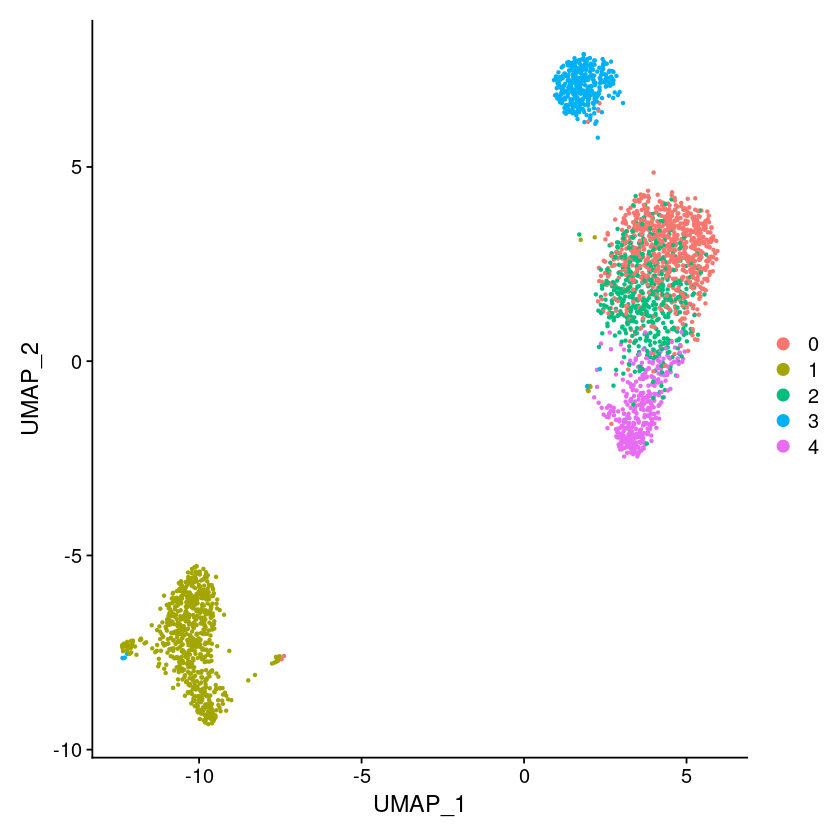

In [28]:
DimPlot(pbmc_distance, reduction = 'umap')

In [35]:
umap_reduction <- pbmc_distance@reductions$umap

In [37]:
Embeddings(pbmc_distance[['umap']])

,UMAP_1,UMAP_2
AAACATACAACCAC-1,3.569673,0.83353000
AAACATTGAGCTAC-1,2.417575,7.77800595
AAACATTGATCAGC-1,2.634009,1.21701418
AAACCGTGCTTCCG-1,-9.725524,-7.55808891
AAACCGTGTATGCG-1,2.911563,-2.14687813
AAACGCACTGGTAC-1,5.357564,3.11540710
AAACGCTGACCAGT-1,4.913986,0.67869197
AAACGCTGGTTCTT-1,3.228891,-0.07483802
AAACGCTGTAGCCA-1,4.816765,0.38893165
AAACGCTGTTTCTG-1,-9.785491,-7.95431436
